In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# V correspond to Historical Speed Records
df_v_228 = pd.read_csv("data\PeMSD7\PeMSD7_Full\PeMSD7_V_228.csv", header=None)
print("Total missing values:", df_v_228.isnull().sum().sum()) # 0 indicating no missing values
print("Shape:", df_v_228.shape)
print(df_v_228.head())

# W correspond Weighted Adjacency Matrix (describes the connections between sensor nodes)
df_w_228 = pd.read_csv("data\PeMSD7\PeMSD7_Full\PeMSD7_W_228.csv", header=None)
print("Total missing values:", df_w_228.isnull().sum().sum()) # 0 indicating no missing values
print("Shape:", df_w_228.shape)
print(df_w_228.head())

# Data provided is already cleaned

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Roni\AppData\Local\Temp\ipykernel_17908\1947893036.py:5: SyntaxWarning: invalid escape sequence '\P'
  df_v_228 = pd.read_csv("data\PeMSD7\PeMSD7_Full\PeMSD7_V_228.csv", header=None)
C:\Users\Roni\AppData\Local\Temp\ipykernel_17908\1947893036.py:11: SyntaxWarning: invalid escape sequence '\P'
  df_w_228 = pd.read_csv("data\PeMSD7\PeMSD7_Full\PeMSD7_W_228.csv", header=None)


Total missing values: 0
Shape: (12672, 228)
    0     1     2     3     4     5     6     7     8     9    ...   218  \
0  71.1  66.0  64.6  65.6  67.1  71.9  68.6  67.7  65.8  40.9  ...  69.1   
1  68.1  66.8  61.7  66.7  64.5  71.6  72.3  64.9  65.6  40.1  ...  70.6   
2  68.0  64.3  66.6  68.7  68.1  70.5  70.2  61.7  63.4  39.6  ...  72.2   
3  68.3  67.8  65.9  66.6  67.9  70.3  69.8  67.6  63.2  37.6  ...  71.2   
4  68.9  69.5  61.2  67.4  64.0  68.1  67.0  66.7  64.2  36.8  ...  71.3   

    219   220   221   222   223   224   225   226   227  
0  70.9  65.0  64.5  66.6  66.6  65.0  69.3  67.7  68.9  
1  65.4  65.0  64.9  65.1  67.7  65.0  67.7  68.8  68.8  
2  70.5  65.0  64.7  66.7  68.9  65.0  70.2  69.1  68.7  
3  69.7  65.0  65.2  67.2  66.9  65.0  70.4  67.3  69.0  
4  65.8  65.0  66.3  66.7  66.2  65.0  68.0  67.4  68.1  

[5 rows x 228 columns]
Total missing values: 0
Shape: (228, 228)
        0        1        2         3        4         5         6        7    \
0   

RMSE: 9.3942


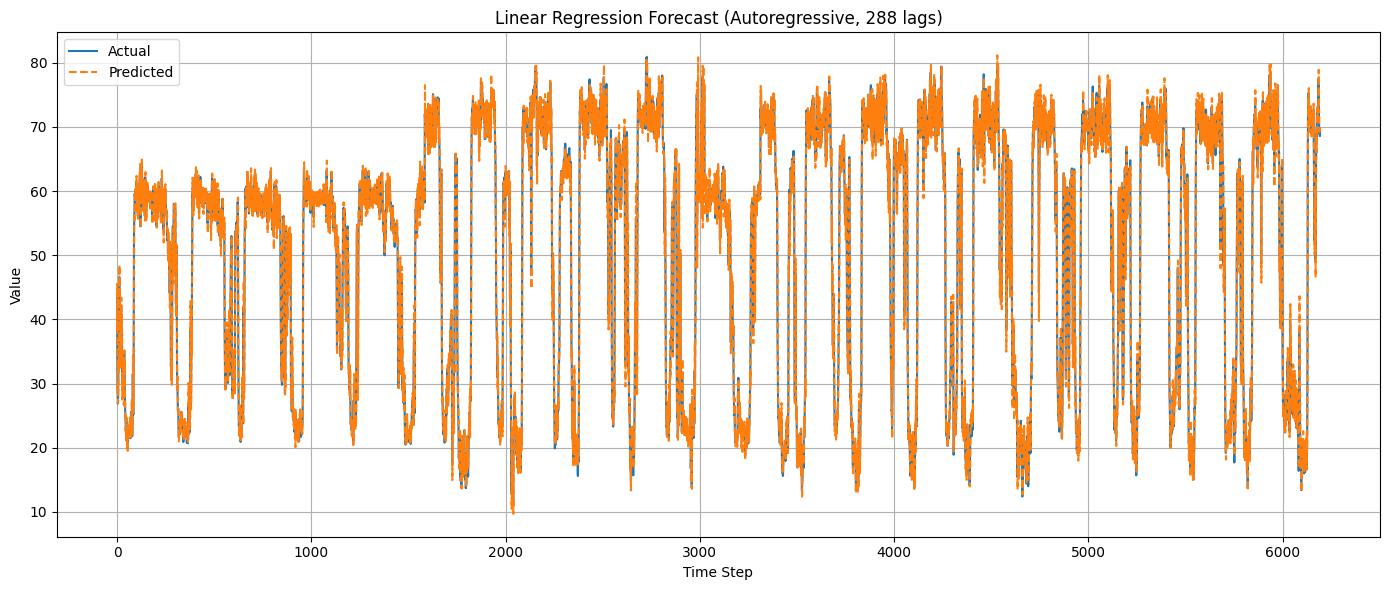

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Time series of sensor 0:
time_series_sensor_0_5min_step = df_v_228[0]
t = np.arange(len(time_series_sensor_0_5min_step)) * 5
data = time_series_sensor_0_5min_step

# Split data into train and test sets
train_size = int(len(data) * 0.5)
train, test = data[:train_size], data[train_size:]
x = time_series_sensor_0_5min_step

X = []
y = []
for i in range(288, len(x)):
    X.append(x[i-288: i])
    y.append(x[i])

X = np.array(X)
y = np.array(y)

split = int(len(X) * 0.5)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted", linestyle="--")
plt.title("Linear Regression Forecast (Autoregressive, 288 lags)")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # Fit ARIMA model
# # p, d, q values need to be determined (can use auto_arima from pmdarima)
# # p: AR order, d: differencing, q: MA order
# model = ARIMA(train, order=(20, 2, 2))  # Example values, adjust as needed
# model_fit = model.fit()

# # Make predictions
# predictions = model_fit.forecast(steps=len(test))

# # Plot results
# plt.figure(figsize=(12, 6))
# plt.plot(np.arange(len(train)), train, label='Training Data')
# plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Actual Data')
# plt.plot(np.arange(len(train), len(train) + len(test)), predictions, label='Predictions', linestyle='--')
# plt.xlabel('Time Step')
# plt.ylabel('Value')
# plt.title('ARIMA Time Series Forecast')
# plt.legend()
# plt.show()

# # Calculate error
# rmse = np.sqrt(mean_squared_error(test, predictions))
# print(f'RMSE: {rmse}')

In [6]:
# Start with last window from training set
last_known = list(X_train[-1])  # shape: (288,)

n_steps = len(X) - len(X_train)  # how many future steps you want to forecast
predicted = []

for _ in range(n_steps):
    # Predict next value
    next_val = model.predict([last_known])[0]
    predicted.append(next_val)
    
    # Update the input window: slide forward and append the prediction
    last_known = last_known[1:] + [next_val]


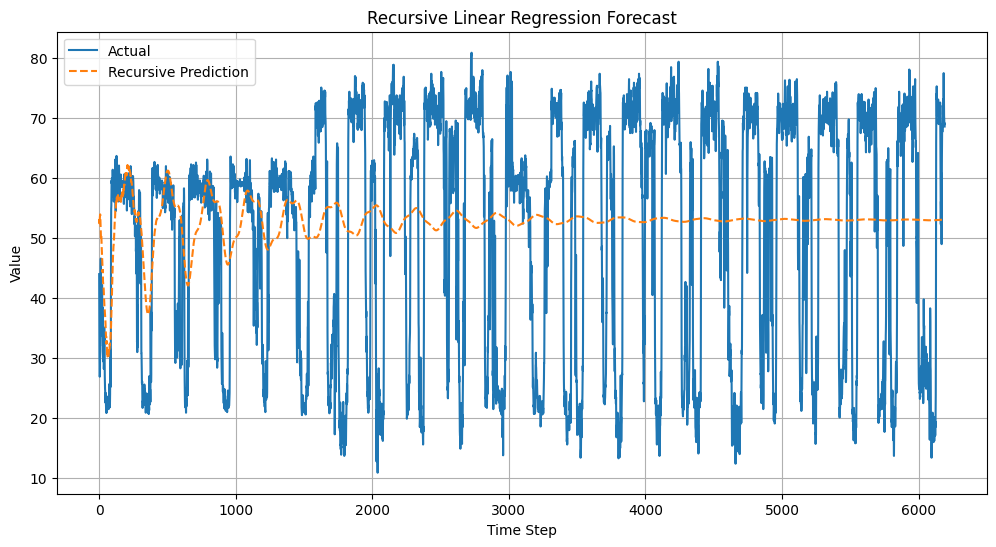

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(predicted, label="Recursive Prediction", linestyle='--')
plt.title("Recursive Linear Regression Forecast")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predicted)
print(f"Recursive RMSE: {rmse:.4f}")



Recursive RMSE: 386.9269
